In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import normalized_mutual_info_score
import sys
sys.path.append('../data_processing/')
from feature import Feature
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter

In [12]:
df_raw = pd.read_hdf('../../data/original/train.h5', key='table')

In [13]:
idx_begin = int(5.6e6) 
idx_end = int(50e6)
num_samples = idx_end - idx_begin

In [14]:
ttf_df = df_raw['ttf'].iloc[idx_begin:idx_end]
sig_df = df_raw['s'].iloc[idx_begin:idx_end]



w_last_elem(self, window_size=150000, window_stride=1000): 100%|██████████| 44251/44251 [00:02<00:00, 14808.58it/s]
	 window decorator for w_last_elem: 
	 - window size: 150000
	 - window stride: 1000


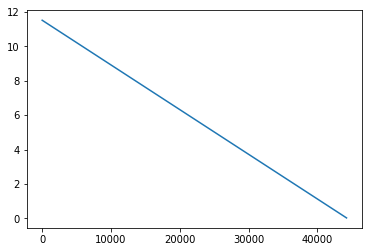

In [15]:
ttf = Feature(ttf_df, '../../data/original/').w_last_elem(window_size=150000, window_stride=1000).data
num_samples = ttf.shape[0]
plt.plot(ttf)
plt.show()

In [16]:


signal_filtered = Feature(sig_df, '../../data/original/').r_sta_lta(sta_window=101, lta_window=1001)\
.w_quantile(q=0.50, window_size=150000, window_stride=1000)\
.data


	 Rolling decorator for r_sta_lta: 
w_quantile(self, q=0.5, window_size=150000, window_stride=1000, (q=0.05)): 100%|██████████| 44251/44251 [00:56<00:00, 777.76it/s]
	 window decorator for w_quantile: 
	 - window size: 150000
	 - window stride: 1000


In [90]:
signal_filtered_1 = Feature(sig_df, '../../data/original/').r_sta_lta(sta_window=101, lta_window=1001)\
.w_skewness(window_size=150000, window_stride=1000)\
.data


	 Rolling decorator for r_sta_lta: 
w_skewness(self, window_size=150000, window_stride=1000): 100%|██████████| 44251/44251 [01:54<00:00, 387.15it/s]
	 window decorator for w_skewness: 
	 - window size: 150000
	 - window stride: 1000


In [18]:
signal_filtered_2 = Feature(sig_df, '../../data/original/').r_std(window_size=50)\
.w_quantile(window_size=150000, window_stride=1000, q=0.01)\
.data


	 Rolling decorator for r_std: 
w_quantile(self, window_size=150000, window_stride=1000, q=0.01, (q=0.05)): 100%|██████████| 44251/44251 [00:52<00:00, 835.88it/s] 
	 window decorator for w_quantile: 
	 - window size: 150000
	 - window stride: 1000


In [19]:
signal_filtered_3 = Feature(sig_df, '../../data/original/').r_std(window_size=1000)\
.w_mean(window_size=150000, window_stride=1000)\
.data


	 Rolling decorator for r_std: 
w_mean(self, window_size=150000, window_stride=1000, (axis=0)): 100%|██████████| 44251/44251 [00:09<00:00, 4707.75it/s]
	 window decorator for w_mean: 
	 - window size: 150000
	 - window stride: 1000


In [28]:
signal_filtered_5 = Feature(sig_df, '../../data/original/').r_std(window_size=101)\
.w_quantile(window_size=150000, window_stride=1000, q=0.05)\
.data

	 Rolling decorator for r_std: 
w_quantile(self, window_size=150000, window_stride=1000, q=0.05, (q=0.05)): 100%|██████████| 44251/44251 [00:50<00:00, 868.10it/s] 
	 window decorator for w_quantile: 
	 - window size: 150000
	 - window stride: 1000


In [83]:
signal_filtered_6 = Feature(sig_df, '../../data/original/').r_std(window_size=50)\
.w_linear_trend(window_size=1000, window_stride=1000)\
.data

signal_filtered_6 = signal_filtered_6.iloc[:ttf.shape[0]]

	 Rolling decorator for r_std: 
w_linear_trend(self, window_size=1000, window_stride=1000): 100%|██████████| 44400/44400 [00:23<00:00, 1863.63it/s]
	 window decorator for w_linear_trend: 
	 - window size: 1000
	 - window stride: 1000


In [87]:
signal_filtered_7 = Feature(sig_df, '../../data/original/').r_std(window_size=50)\
.w_linear_trend(window_size=1000, window_stride=1000)\
.w_quantile(window_size=150, window_stride=1, q=0.5)\
.data


signal_filtered_7 = signal_filtered_7.iloc[:ttf.shape[0]]

	 Rolling decorator for r_std: 
w_linear_trend(self, window_size=1000, window_stride=1000): 100%|██████████| 44400/44400 [00:23<00:00, 1856.95it/s]
	 window decorator for w_linear_trend: 
	 - window size: 1000
	 - window stride: 1000
w_quantile(self, window_size=150, window_stride=1, q=0.5, (q=0.05)): 100%|██████████| 44251/44251 [00:09<00:00, 4804.15it/s]
	 window decorator for w_quantile: 
	 - window size: 150
	 - window stride: 1


In [93]:
signal_filtered_8 = Feature(sig_df, '../../data/original/')\
.w_quantile(window_size=150000, window_stride=1000, q=0.05)\
.data


w_quantile(self, window_size=150000, window_stride=1000, q=0.05, (q=0.05)): 100%|██████████| 44251/44251 [01:10<00:00, 628.32it/s]
	 window decorator for w_quantile: 
	 - window size: 150000
	 - window stride: 1000


In [94]:
signal_filtered_9 = Feature(sig_df, '../../data/original/')\
.w_quantile(window_size=150000, window_stride=1000, q=0.95)\
.data


w_quantile(self, window_size=150000, window_stride=1000, q=0.95, (q=0.05)): 100%|██████████| 44251/44251 [01:08<00:00, 647.78it/s]
	 window decorator for w_quantile: 
	 - window size: 150000
	 - window stride: 1000


In [95]:
signal_filtered_10 = Feature(sig_df, '../../data/original/')\
.w_quantile(window_size=150000, window_stride=1000, q=0.5)\
.data


w_quantile(self, window_size=150000, window_stride=1000, q=0.5, (q=0.05)): 100%|██████████| 44251/44251 [01:14<00:00, 591.05it/s]
	 window decorator for w_quantile: 
	 - window size: 150000
	 - window stride: 1000


In [96]:
df = pd.DataFrame({'ttf': ttf.squeeze(),
                  'sta_lta_q05': signal_filtered.squeeze(),
                  'sta_lta_skewness': signal_filtered_1.squeeze(),
                  'std_q001': signal_filtered_2.squeeze(),
                  'std_q005': signal_filtered_5.squeeze(),
                   'std_kurtosis': signal_filtered_6.squeeze(),
                   'std_kurtosis_std': signal_filtered_7.squeeze(),
                   'q005': signal_filtered_8.squeeze(),
                   'q095': signal_filtered_9.squeeze(),
                   'q050': signal_filtered_10.squeeze(),

                  })


ttf
11.402396197000002
0.13739772837999997


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


(44251,)
0.9507537243854863 0.0013152686219003295
0.0011307053365283294


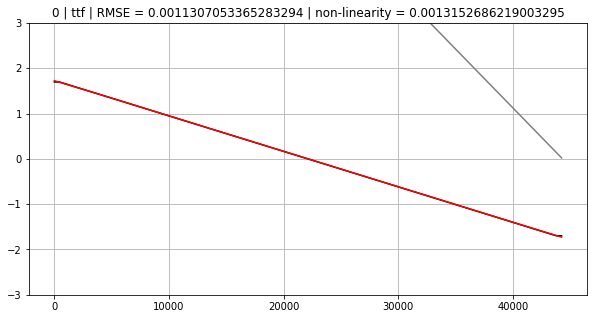

sta_lta_q05
0.9884654108894404
0.8975344386542896
(44251,)
0.8952613616350052 0.32006478832864055
0.25696321083124096


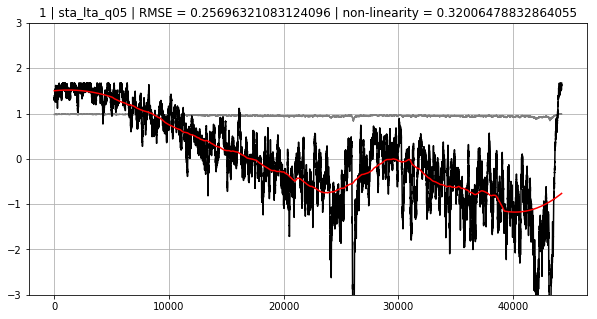

sta_lta_skewness
11.455773382381953
3.284225308097815
(44251,)
0.7336344534283671 0.6047436342015369
0.45730827987520273


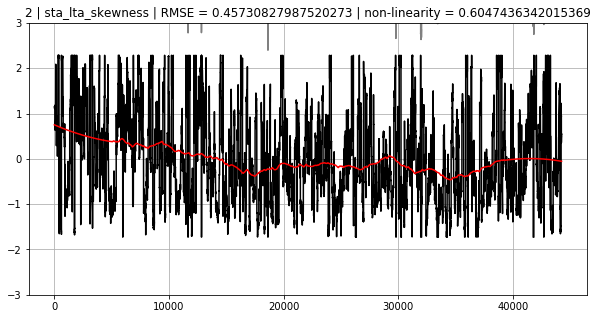

std_q001
2.2595574784489916
1.9713954448629498
(44251,)
0.29427202037270106 0.9040676702494066
0.22724697982540576


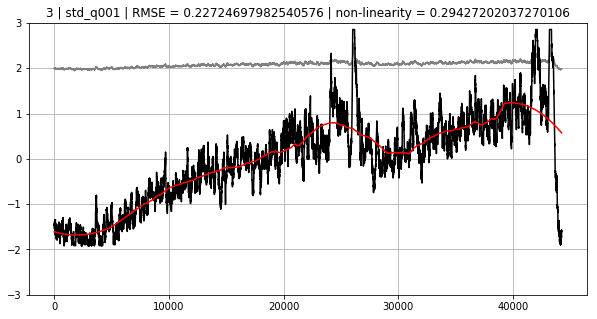

std_q005
2.681359223513399
2.308608576921412
(44251,)
0.29181955563010775 0.9048622664893633
0.22401283664263638


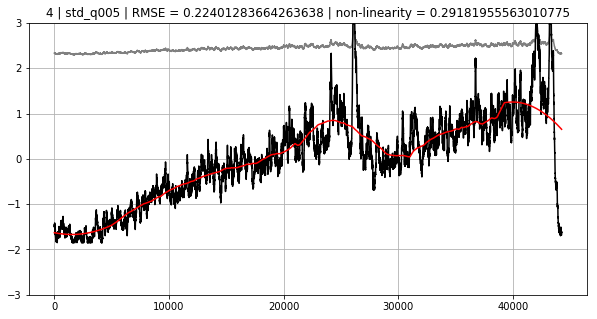

std_kurtosis
0.023141516177367406
-0.018022276821912958
(44251,)
0.6727858350082028 0.6717838897865418
0.4753652265690666


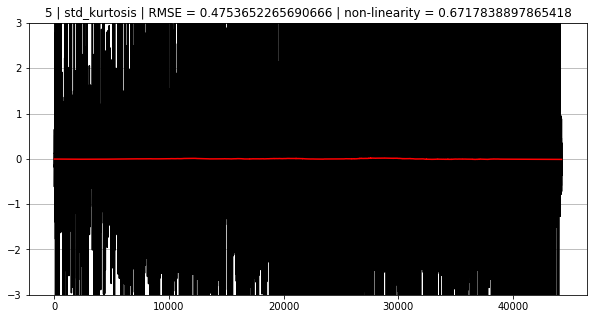

std_kurtosis_std
1.9796716102601464e-05
-0.0003793025895097445
(44251,)
0.8413384310470905 0.44281375182760674
0.37465024989088813


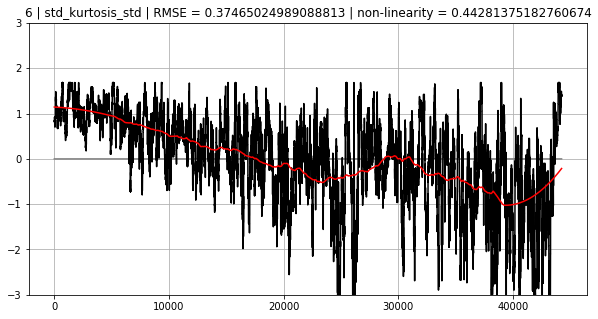

q005
0.0
-7.0
(44251,)
0.8747691810347588 0.3724422831476018
0.3001638931025769


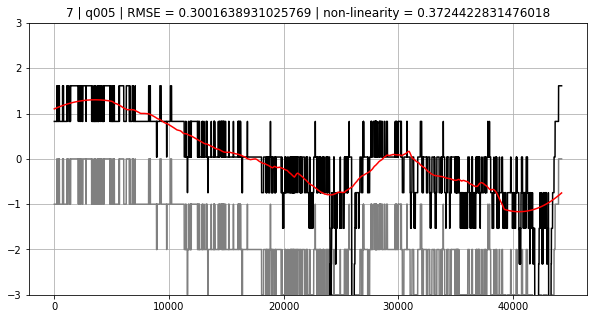

q095
16.0
9.0
(44251,)
0.3426496176490231 0.8868627931587837
0.2862911484312144


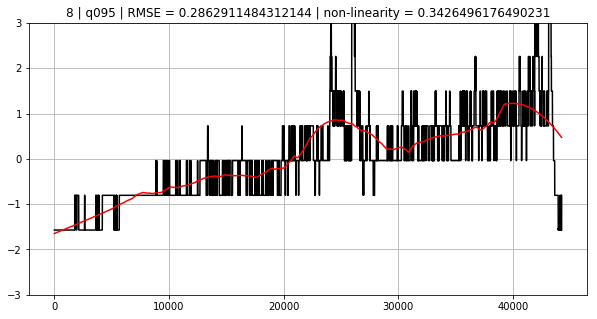

q050
5.0
4.0
(44251,)
0.6398360830473485 0.7032383388262102
0.38521656233849594


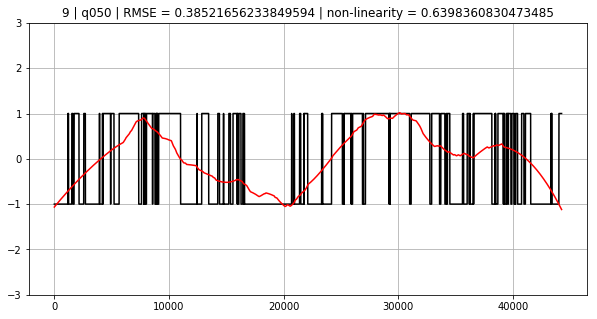

In [97]:
linear_sig = np.linspace(0,1,num_samples).reshape(-1,1)
lin_scaler = StandardScaler()
linear_sig = lin_scaler.fit_transform(linear_sig).flatten()
inv_linear_sig = -1. * linear_sig

for i, col in enumerate(df.columns[:]):
    sig = df[col]
    thresh_max = np.quantile(sig, q=0.99)
    thresh_min = np.quantile(sig, q=0.01)
    print(col)
    print(thresh_max)
    print(thresh_min)
    signal_clipped = np.clip(sig, a_min=thresh_min, a_max=thresh_max)
    scaler = StandardScaler()
    scaler.fit(signal_clipped.values.astype('float').reshape(-1,1))
    signal_clip_normed = scaler.transform(signal_clipped.values.astype('float').reshape(-1,1)).squeeze()    
#     signal_clip_normed = signal_clipped


    signal_clip_normed_smooth = savgol_filter(signal_clip_normed, window_length=10001, polyorder=2)
    print(signal_clip_normed.shape)
    rmse = np.linalg.norm(signal_clip_normed - signal_clip_normed_smooth) / num_samples * 100
    # * 100 is just a scaling for better representativeness
    l1 = np.abs(np.sum(signal_clip_normed - signal_clip_normed_smooth)) / num_samples
    
    # also measure how much it differs from ttf or its inverse and pick the best result
    # this checks for both monotonicity of the feature and its linear trend which are both highly preferable

    dist = np.linalg.norm(signal_clip_normed - linear_sig, axis=0) / num_samples * 100
    dist_1 = np.linalg.norm(signal_clip_normed - inv_linear_sig, axis=0) / num_samples * 100
    print(dist, dist_1)
    dist_min = min(dist, dist_1)
    
    print(rmse)
    plt.figure(figsize=(10,5))
    plt.plot(sig.values, 'gray')
    plt.plot(signal_clip_normed, 'k')
    plt.plot(signal_clip_normed_smooth, 'r')
#     plt.plot(linear_sig, 'b')
#     plt.plot(inv_linear_sig, 'b')
    plt.grid()
    plt.title(str(i) + " | " + col + " | RMSE = " +str(rmse) + ' | non-linearity = ' + str(dist_min))
    plt.ylim(ymin = -3., ymax=3.)
    
    plt.show()

In [86]:
np.isnan(signal_filtered_6).any()

r_std(self, window_size=50)-w_linear_trend(self, window_size=1000, window_stride=1000)    False
dtype: bool

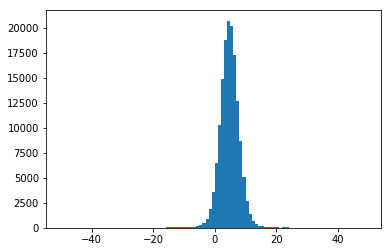

In [108]:
plt.figure()
plt.hist(sig_df.values[:150000], bins=np.arange(-50, 50, 1))
plt.show()


In [117]:
[np.quantile(sig_df.values[:150000].astype(float), q=x) for x in [0.05, 0.10, 0.5, 0.95]]

[-1.0, 1.0, 4.0, 9.0]